# Atividade 3.1

Classificação de padrões, conforme tabela abaixo, com o conjunto de treinamento dos 22 vetores. 

Após 3 iterações, apresente o conjunto de testes de 8 vetores dado abaixo.

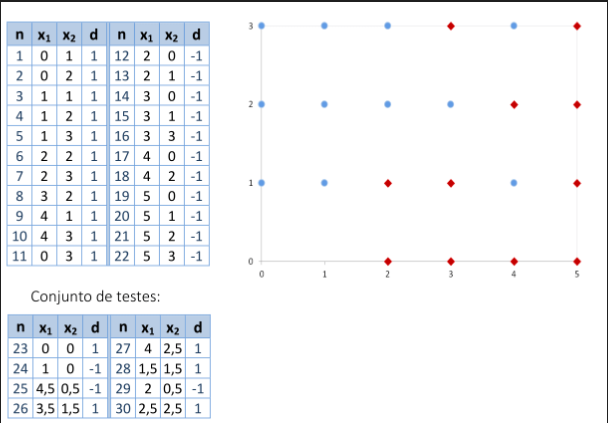

0. Inicialize os pesos das conexões e do bias com valores aleatórios; 

 * inicialize a taxa de aprendizagem α. Para cada padrão de entrada, execute os passos de 1 a 3:

    1. Calcule as entradas na camada escondida, e a saída da rede: 

       $z_j* = \sum_{i}v_{ij}x_i + θa_j  ⇒  z_j = 1/(1 + e^{-z_j*}), \ onde \ j = 1, ..., p, i = 1, ..., n \\
       y* = \sum_{j}w_j z_j + θb  ⇒  y = 1/(1 + e^{-y*}) $

    2. Calcule as correções das conexões da camada de saída:
      * Se n=1 então:

         $ △w_{nj} = αy(1 – y)(d – y)z_{nj}  ⇒  w_{nj} = w_{nj} + △w_{nj} $

      * Caso contrário n>1 então use a taxa de momento:
      
         $ △w_{nj} = αy(1 – y)(d – y)z_{nj}  ⇒  w_{nj} = w_{nj} + △w_{nj} + \gamma [w_{nj} - w_{(n-1)j}] \\
         △θb = αy(1 – y)(d – y)  ⇒  θb = θb + △θb $

    3. Calcule as correções das conexões da camada escondida:
    
       $△v_{ij} = α(d – y)y(1 – y)w_j z_j(1 - z_j)x_i  ⇒  v_{ij} = v_{ij} + △v_{ij} \\
       △θa_j = α(d – y)y(1 – y)w_j z_j(1 - z_j)  ⇒  θa_j = θa_j + △θa_j $

    4. Atualize a taxa de aprendizagem, verifique os erros para todos os padrões de entrada,
    e teste o critério de parada

## Algoritmo

In [1]:
public double ErroQuadraticoMedio(int _n_linhas, int _n_colunas,int _n_neuronios, double[,] _x, double[] _d, double[] _w ,double _thetaSaida,double[] _thetaEscondida,double[,] _v){
    
    double somaQuadradoDaDiferenca = 0;

    int c = 1;
    Console.WriteLine($"=====================================");
    Console.WriteLine($"==========Iniciando cálculo do Erro Quadrático=======");
    Console.WriteLine($"=====================================");
    for(int linha=0;linha<_n_linhas;linha++){
                

        Console.WriteLine($"Entrada:{linha+c}");
        
        // Calculando z
        double[] _z = new double[_n_neuronios];

        for(int j=0;j<_n_neuronios;j++){
            
            double zSoma = 0;

            for(int i=0;i<_n_colunas;i++){
                zSoma+=_v[i,j]*_x[linha,i];
                Console.WriteLine($"_v_{i}_{j}:{_v[i,j]} ,_x_{linha}_{j}:{_x[linha,i]} ");
            }
            _z[j] = zSoma + _thetaEscondida[j];
            _z[j] = 1/(1+Math.Exp(-_z[j]));
            Console.WriteLine($"_z_{j+c}:{_z[j]}");
        }

        double y =0;
        double yEstrela=0;
        //calculando somatório das variáveis da entrada
        for(int j=0;j<_n_neuronios;j++){

            yEstrela += _z[j]*_w[j];

        }

        //adicionando theta ao somatório
        yEstrela = yEstrela + _thetaSaida;
        Console.WriteLine($"yEstrela:{yEstrela}");

        y=1/(1+Math.Exp(-yEstrela));
        
        Console.WriteLine($"y_:{y}");
        var quadradoDiferenca = Math.Pow((_d[linha]-y),2);
        Console.WriteLine($"quadradoDiferenca:{quadradoDiferenca}");
        somaQuadradoDaDiferenca+= quadradoDiferenca;

    }

    Console.WriteLine($"ErroQuadradoMedio:{somaQuadradoDaDiferenca/2}");
    return somaQuadradoDaDiferenca/2;

}
 
public (double[] _w, double _thetaSaida, double[] _thetaEscondida,double[,] _v) MLPMomento(int n_iteracoes,int n_neuronios,double[] thetaEscondida, int[][] ordem, double[] w, double alpha, double[,] x, int n_linhas, int n_colunas,double[] d,double erroAceito,double thetaSaida, double[,] v, double[] z, double taxaMomento){
    
    int contagem_iteracoes = 1;
    bool continuarLoop = true;
    int c = 1;
    double[] w_anterior = new double[n_neuronios];
    // número máximo de iterações
    while(contagem_iteracoes<=n_iteracoes && continuarLoop){
        
        Console.WriteLine($"=====================================================");
        Console.WriteLine($"================   iteracao{contagem_iteracoes}  =============");
        Console.WriteLine($"=====================================================");

        //calculando z
        foreach(var linha in ordem[contagem_iteracoes-1]){
            Console.WriteLine($"=====================================================");
            Console.WriteLine($"================   Entrada_{linha}  =============");
            Console.WriteLine($"=====================================================");
            for(int j=0;j<n_neuronios;j++){
                
                double _z = 0;

                for(int i = 0;i<n_colunas;i++){
                    Console.WriteLine($"v_{i+c}_{j+c}:{v[i,j]} , x_{linha}_{i+c}:{x[linha-c,i]}");
                    _z+=v[i,j]*x[linha-c,i];
                    Console.WriteLine($"_z_{i+c}:{_z}");
                }
                _z = _z + thetaEscondida[j];
                Console.WriteLine($"z*_{j+c}:{_z}");
                _z = 1/(1+Math.Exp(-_z));
                Console.WriteLine($"z_{j+c}:{_z}");
                z[j]=_z;

            }

            //calculando y
            double y=0;
            for(int j=0;j<n_neuronios;j++){
                y += w[j]*z[j];
            }

            y= y+thetaSaida;

            y=1/(1+Math.Exp(-y));

            Console.WriteLine($"y:{y}");

            //Calculando w
            
            if(linha==1 && contagem_iteracoes==1){
                for(int j=0;j<n_neuronios;j++){

                    w[j] = alpha*y*(1-y)*(d[linha-c]-y)*z[j] + w[j] ;
                    Console.WriteLine($"w_{j+c}:{w[j]}");

                }    
            }else{
                for(int j=0;j<n_neuronios;j++){

                    w[j] = alpha*y*(1-y)*(d[linha-c]-y)*z[j] + w[j] + taxaMomento*(w[j]-w_anterior[j]);
                    Console.WriteLine($"w_{j+c}:{w[j]}");
                    w_anterior[j] = w[j];
                }    
            }
            
            

            //calculando theta
            thetaSaida = alpha*y*(1-y)*(d[linha-c]-y) + thetaSaida;
            Console.WriteLine($"thetaSaida:{thetaSaida}");

            for(int i =0;i<n_colunas;i++){
                for(int j = 0;j<n_neuronios;j++){
                    v[i,j]= alpha*y*(1-y)*(d[linha-c]-y)*w[j]*z[j]*(1-z[j])*x[linha-c,i]+v[i,j];
                    Console.WriteLine($"v_{i+c}_{j+c}:{v[i,j]}");
                }
            }

            for(int j = 0;j<n_neuronios;j++){
                thetaEscondida[j]= alpha*y*(1-y)*(d[linha-c]-y)*w[j]*z[j]*(1-z[j])+thetaEscondida[j];
                Console.WriteLine($"thetaEscondida_{j+c}:{thetaEscondida[j]}");
            }
        }

        continuarLoop = !(ErroQuadraticoMedio(n_linhas, n_colunas,n_neuronios, x, d, w ,thetaSaida,thetaEscondida,v) <= erroAceito);
        alpha = alpha*0.95;
        contagem_iteracoes++;
        
    }

    return (w, thetaSaida, thetaEscondida,v);
}

## Entradas

In [2]:
// iniciando a matriz de entradas
// lembrando que c# começa em zero por isso a variável c para corrigir o índice
int c = 1;
int n_linhas = 22;
int n_colunas = 2;
int n_neuronios = 3;
double[,] x = new double[n_linhas,n_colunas];
x[1-c,1-c]=0;
x[1-c,2-c]=1;
x[2-c,1-c]=0;
x[2-c,2-c]=2;
x[3-c,1-c]=1;
x[3-c,2-c]=1;
x[4-c,1-c]=1;
x[4-c,2-c]=2;
x[5-c,1-c]=1;
x[5-c,2-c]=3;
x[6-c,1-c]=2;
x[6-c,2-c]=2;
x[7-c,1-c]=2;
x[7-c,2-c]=3;
x[8-c,1-c]=3;
x[8-c,2-c]=2;
x[9-c,1-c]=4;
x[9-c,2-c]=1;
x[10-c,1-c]=4;
x[10-c,2-c]=3;
x[11-c,1-c]=0;
x[11-c,2-c]=3;
x[12-c,1-c]=2;
x[12-c,2-c]=0;
x[13-c,1-c]=2;
x[13-c,2-c]=1;
x[14-c,1-c]=3;
x[14-c,2-c]=0;
x[15-c,1-c]=3;
x[15-c,2-c]=1;
x[16-c,1-c]=3;
x[16-c,2-c]=3;
x[17-c,1-c]=4;
x[17-c,2-c]=0;
x[18-c,1-c]=4;
x[18-c,2-c]=2;
x[19-c,1-c]=5;
x[19-c,2-c]=0;
x[20-c,1-c]=5;
x[20-c,2-c]=1;
x[21-c,1-c]=5;
x[21-c,2-c]=2;
x[22-c,1-c]=5;
x[22-c,2-c]=3;

//iniciando vetor da variável resposta
double[] d = new double[n_linhas];
d[1-c]=1;
d[2-c]=1;
d[3-c]=1;
d[4-c]=1;
d[5-c]=1;
d[6-c]=1;
d[7-c]=1;
d[8-c]=1;
d[9-c]=1;
d[10-c]=1;
d[11-c]=1;
d[12-c]=0;
d[13-c]=0;
d[14-c]=0;
d[15-c]=0;
d[16-c]=0;
d[17-c]=0;
d[18-c]=0;
d[19-c]=0;
d[20-c]=0;
d[21-c]=0;
d[22-c]=0;

//delta alpha e theta iniciais
double alpha = 1;
double[] thetaEscondida = new double[n_neuronios];
thetaEscondida[1-c]=0.9;
thetaEscondida[2-c]=0.9;
thetaEscondida[3-c]=-0.9;
double thetaSaida =-0.9;
double taxaMomento = 0.7;

//iniciando o vetor de pesos 
double[] w = new double[n_neuronios];
w[1-c] = 0.9;
w[2-c] = -0.9;
w[3-c] = 0.9;

double[,] v = new double[n_colunas,n_neuronios];
v[1-c,1-c] = -0.9 ;
v[2-c,1-c] = 0.9 ;
v[1-c,2-c] = 0.9 ;
v[2-c,2-c] = -0.9 ;
v[1-c,3-c] = -0.9 ;
v[2-c,3-c] = 0.9 ;

double[] z = new double[n_neuronios];

//lista contendo a ordem específica das entradas em cada iteração, usada para "embaralhar" e diversificar o treinamento
int n_iteracoes = 6;
int[][] ordem = new int[n_iteracoes][];
ordem[1-c] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22];
ordem[2-c] = [1,22,2,21,3,20,4,19,5,18,6,17,7,16,8,15,9,14,10,13,11,12];
ordem[3-c] = [1,17,22,7,2,16,21,8,3,15,20,9,4,14,19,10,5,13,18,11,6,12];
ordem[4-c] = [1,22,2,21,3,20,4,19,5,18,6,17,7,16,8,15,9,14,10,13,11,12];
ordem[5-c] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22];
ordem[6-c] = [1,17,22,7,2,16,21,8,3,15,20,9,4,14,19,10,5,13,18,11,6,12];

## Treinamento

In [3]:
var erroAceito = 0.5;
//realização do treimanto passando os dados de entrada
(double[] _w, double _thetaSaida, double[] _thetaEscondida,double[,] _v)= MLPMomento(n_iteracoes, n_neuronios, thetaEscondida,  ordem,  w,  alpha,  x,  n_linhas,  n_colunas, d, erroAceito, thetaSaida,  v,  z,taxaMomento);

//plotando pesos w e o theta do resultado do treinamento
var resultado = "";
for(int i =0;i<_w.Length;i++){
    resultado += $"w_{i+c}:{w[i]} | ";
}
resultado +=$"theta:{_thetaSaida} | ";

Console.WriteLine($"Resultado: {resultado}");

================   iteracao1  =============
================   Entrada_1  =============
v_1_1:-0,9 , x_1_1:0
_z_1:0
v_2_1:0,9 , x_1_2:1
_z_2:0,9
z*_1:1,8
z_1:0,8581489350995123
v_1_2:0,9 , x_1_1:0
_z_1:0
v_2_2:-0,9 , x_1_2:1
_z_2:-0,9
z*_2:0
z_2:0,5
v_1_3:-0,9 , x_1_1:0
_z_1:0
v_2_3:0,9 , x_1_2:1
_z_2:0,9
z*_3:0
z_3:0,5
y:0,4681267893600945
w_1:1,013642923009678
w_2:-0,8337860140812856
w_3:0,9662139859187144
thetaSaida:-0,7675720281625711
v_1_1:-0,9
v_1_2:0,9
v_1_3:-0,9
v_2_1:0,916340298609313
v_2_2:-0,9276041476977996
v_2_3:0,9319884396290434
thetaEscondida_1:0,916340298609313
thetaEscondida_2:0,8723958523022004
thetaEscondida_3:-0,8680115603709566
================   Entrada_2  =============
v_1_1:-0,9 , x_2_1:0
_z_1:0
v_2_1:0,916340298609313 , x_2_2:2
_z_2:1,832680597218626
z*_1:2,7490208958279387
z_1:0,9398580298761936
v_1_2:0,9 , x_2_1:0
_z_1:0
v_2_2:-0,9276041476977996 , x_2_2:2
_z_2:-1,8552082953955993
z*_2:-0,9828124430933989
z_2:0,2723340900572065
v_1_3:-0,9 , x_2_1:0
_z_1:0
v_

## Testes

In [4]:
int ct = 1;
int n_linha_teste = 8;
int n_colunas_teste = 2;
int n_neuronios_teste = 3;
double[,] x_teste = new double[n_linha_teste,n_colunas_teste];
x_teste[1-ct,1-ct]=0;
x_teste[1-ct,2-ct]=0;
x_teste[2-ct,1-ct]=1;
x_teste[2-ct,2-ct]=0;
x_teste[3-ct,1-ct]=4.5;
x_teste[3-ct,2-ct]=0.5;
x_teste[4-ct,1-ct]=3.5;
x_teste[4-ct,2-ct]=1.5;
x_teste[5-ct,1-ct]=4;
x_teste[5-ct,2-ct]=2.5;
x_teste[6-ct,1-ct]=1.5;
x_teste[6-ct,2-ct]=1.5;
x_teste[7-ct,1-ct]=2;
x_teste[7-ct,2-ct]=0.5;
x_teste[8-ct,1-ct]=2.5;
x_teste[8-ct,2-ct]=2.5;

double[] d_teste = new double[n_linha_teste];
d_teste[1-ct]=1;
d_teste[2-ct]=0;
d_teste[3-ct]=0;
d_teste[4-ct]=1;
d_teste[5-ct]=1;
d_teste[6-ct]=1;
d_teste[7-ct]=0;
d_teste[8-ct]=1;

Console.WriteLine($"Teste_ErroQuadraticoMedio: {ErroQuadraticoMedio(n_linha_teste, n_colunas_teste,n_neuronios_teste, x_teste, d_teste, _w ,_thetaSaida,_thetaEscondida,_v)}");

==========Iniciando cálculo do Erro Quadrático=======
Entrada:1
_v_0_0:-0,996577511921062 ,_x_0_0:0 
_v_1_0:1,4056744532852252 ,_x_0_0:0 
_z_1:0,7228955872430414
_v_0_1:1,1548860253330482 ,_x_0_1:0 
_v_1_1:-1,0325812933230791 ,_x_0_1:0 
_z_2:0,6757676980817927
_v_0_2:-1,0824155153401647 ,_x_0_2:0 
_v_1_2:1,2108628420760021 ,_x_0_2:0 
_z_3:0,3352885593532837
yEstrela:0,48332161132145945
y_:0,618531917543531
quadradoDiferenca:0,14551789793301545
Entrada:2
_v_0_0:-0,996577511921062 ,_x_1_0:1 
_v_1_0:1,4056744532852252 ,_x_1_0:0 
_z_1:0,4905743436013182
_v_0_1:1,1548860253330482 ,_x_1_1:1 
_v_1_1:-1,0325812933230791 ,_x_1_1:0 
_z_2:0,8686728627127357
_v_0_2:-1,0824155153401647 ,_x_1_2:1 
_v_1_2:1,2108628420760021 ,_x_1_2:0 
_z_3:0,1459435977981488
yEstrela:-0,6308561227867961
y_:0,34731643991588407
quadradoDiferenca:0,1206287094358439
Entrada:3
_v_0_0:-0,996577511921062 ,_x_2_0:4,5 
_v_1_0:1,4056744532852252 ,_x_2_0:0,5 
_z_1:0,0560996429944953
_v_0_1:1,1548860253330482 ,_x_2_1:4,5 
_v_1_1

# Referências
Matéria de metaheurísticas e aplicações - PPGMNE

Siqueira, P.H., "Metaheurísticas e Aplicações". Disponível em: <https://paulohscwb.github.io/metaheuristicas/>, Janeiro de 2021.

### Autor
<a href="https://www.linkedin.com/in/hesauhugocavalcanti/">Hesau Hugo</a>

### Professor
<a href="https://www.linkedin.com/in/paulo-henrique-siqueira-83080130/">Paulo Henrique Siqueira</a>